In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-21-12 09:28:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../../Common/acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from acllite_imageproc import AclLiteImageProc
from acllite_image import AclLiteImage

from src.model import pre_process, construct_image_info, get_sizes
from src.postprocess import post_processing

import cv2
import numpy as np
from PIL import Image, ImageDraw


In [2]:
with open("../../Common/data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [3]:
model_path = "./model/yolov3_caffe.om"
img_path = "../../Common/data/kite.jpg"

MODEL_WIDTH = 416
MODEL_HEIGHT = 416

acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [4]:
get_sizes(model._model_desc)

model input size 2
input  0
model input dims ({'name': 'data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
input  1
model input dims ({'name': 'img_info', 'dimCount': 2, 'dims': [1, 4]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'detection_out3:0:box_out', 'dimCount': 2, 'dims': [1, 6144]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'detection_out3:1:box_out_num', 'dimCount': 2, 'dims': [1, 8]}, 0)
model output datatype 3
[Model] class Model init resource stage success


In [5]:
dvpp = AclLiteImageProc(acl_resource)

In [6]:
image = AclLiteImage(img_path)
bgr_img = cv2.imread(img_path)
#preprocess image
resized_image = pre_process(image, dvpp)

decode jpeg end
[AclLiteImageProc] vpc crop and paste stage:
[AclLiteImageProc] vpc crop and paste stage success
resize yuv end


In [7]:
result_list = model.execute([resized_image, construct_image_info()]) 

In [8]:
boxes = post_processing(result_list)

In [9]:
img = Image.open(img_path)

scalex = img.size[0]/MODEL_HEIGHT

img1 = ImageDraw.Draw(img)
for box in boxes:
    img1.rectangle([box["x1"] * scalex,
                    box["y1"] * scalex,
                    box["x2"] * scalex,
                    box["y2"] * scalex], outline ="red", width=2)


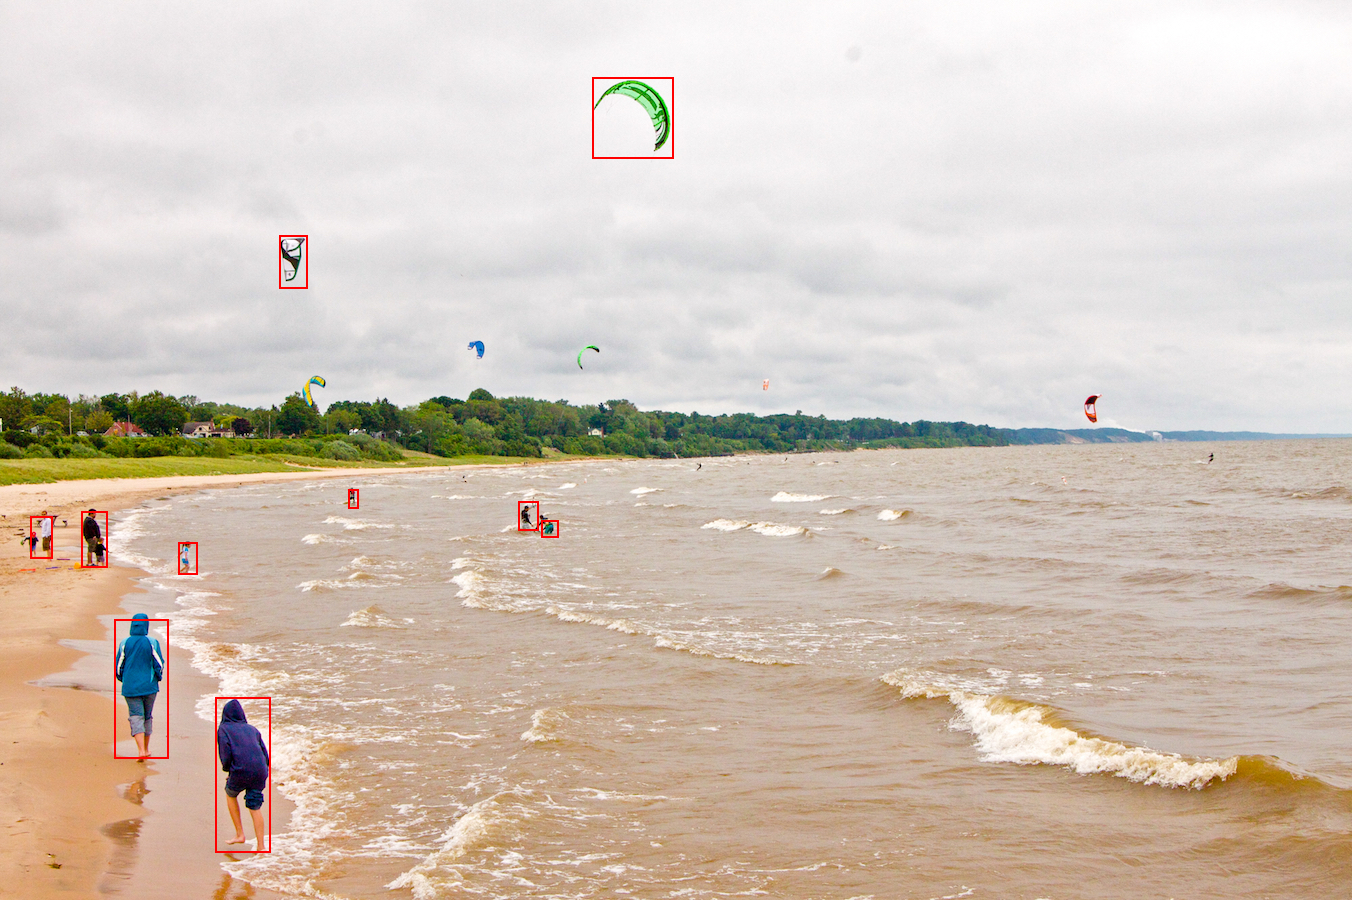

In [10]:
img